In [4]:
from math import e, pi
import numpy as np

from qiskit_ionq import IonQProvider
from qiskit import QuantumCircuit, transpile, IBMQ, execute
from qiskit_aer import AerSimulator

def aer_count(circ):
    backend = AerSimulator()
    qc = transpile(circ, backend)
    job = backend.run(qc, shots = 10000) 
    result = job.result()
    counts = result.get_counts()
    print(counts)

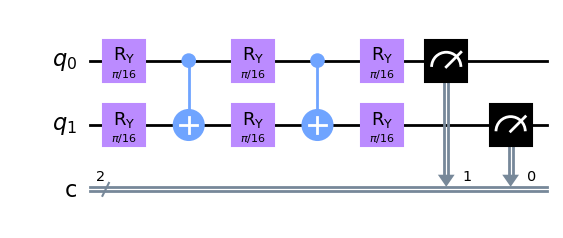

In [5]:
def ansatz(l):
    circ = QuantumCircuit(2,2)
    circ.ry(l, [0,1])
    circ.cx(0,1)
    circ.ry(l, [0,1])
    circ.cx(0,1)
    circ.ry(l, [0,1])
    circ.measure(0,1)
    circ.measure(1,0)
    return circ

ansatz(pi/16).draw('mpl')

In [6]:
for i in range(16):
    aer_count(ansatz((i+1)*pi/16))

{'00': 8661, '11': 194, '01': 724, '10': 421}
{'00': 5586, '01': 1941, '11': 1038, '10': 1435}
{'11': 2545, '01': 2572, '00': 2317, '10': 2566}
{'00': 308, '11': 4569, '01': 1868, '10': 3255}
{'11': 5896, '10': 3385, '01': 611, '00': 108}
{'10': 3071, '11': 5925, '00': 1004}
{'01': 721, '00': 2053, '10': 2720, '11': 4506}
{'11': 2498, '00': 2525, '01': 2442, '10': 2535}
{'10': 2666, '01': 4284, '00': 2190, '11': 860}
{'01': 5048, '10': 3395, '00': 1488, '11': 69}
{'10': 4621, '01': 4577, '00': 745, '11': 57}
{'01': 3201, '10': 6141, '11': 307, '00': 351}
{'10': 7684, '01': 1786, '00': 88, '11': 442}
{'10': 8988, '01': 689, '11': 312, '00': 11}
{'10': 9763, '01': 144, '11': 93}
{'10': 10000}


# Implementation on IonQ devices

In [ ]:
#provider = IonQProvider("")
backend = provider.get_backend("ionq_qpu.aria-1")
job_id_list = [] 
for i in range(16):
    circ_transpiled = transpile(ansatz((i+1)*pi/16), backend)
    job = execute(circ_transpiled, backend, shots= 1000)
    job_id_list.append(job.job_id())
    print(job.job_id())

In [ ]:
qpu_backend = provider.get_backend("ionq_qpu.aria-1")
for i in range(15):
    job_id = job_id_list[i]
    job = qpu_backend.retrieve_job(job_id)
    result = job.result()
    counts = result.get_counts()
    print(counts)